In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

In [3]:
# Visit the website
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

In [6]:
# Create a Beautiful Soup Object
html = browser.html
html_soup = soup(html, 'html.parser')

In [7]:
# Extract all rows of data
table = html_soup.find('table', class_='table')
rows = table.find_all('tr')

In [9]:
# Create an empty list
heads = []
data_ls = []

# Loop through the scraped data to create a list of rows
for i in range(7):
    heads.append(table.find_all('th')[i].text)
    
for i in range(1,len(rows)):
    data_ls.append(rows[i].text.split('\n')[1:-1])

In [10]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
table_df = pd.DataFrame(data_ls,columns=heads)

In [11]:
# Confirm DataFrame was created successfully
table_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [12]:
# Examine data type of each column
table_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [13]:
# Change data types for data analysis
table_df['id'] = table_df['id'].astype(int)
table_df['terrestrial_date'] = pd.to_datetime(table_df['terrestrial_date'])
table_df['sol'] = table_df['sol'].astype(int)
table_df['ls'] = table_df['ls'].astype(int)
table_df['month'] = table_df['month'].astype(int)
table_df['min_temp'] = table_df['min_temp'].astype(float)
table_df['pressure'] = table_df['pressure'].astype(float)

In [14]:
# Confirm type changes were successful by examining data types again
table_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [26]:
# 1. How many months are there on Mars?
months = table_df['month'].nunique()
months

12

In [27]:
# 2. How many Martian days' worth of data are there?
martian_days = max(table_df['sol'])
martian_days

1977

In [28]:
# 3. What is the average low temperature by month?
low_temp_avg = table_df[['min_temp','month']].groupby('month').mean()

<AxesSubplot:xlabel='month'>

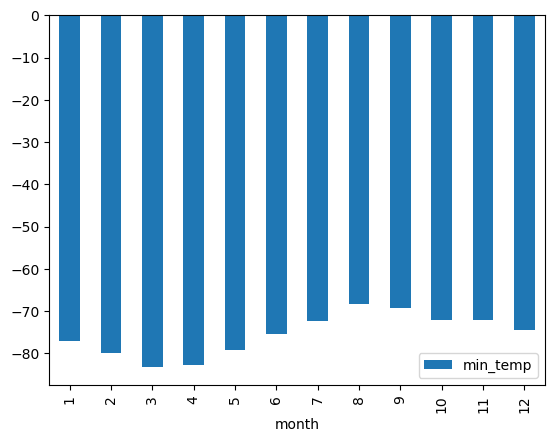

In [29]:
# Plot the average temperature by month
low_temp_avg.plot.bar()

In [33]:
low_temp_avg.reset_index(inplace=True)

In [37]:
# Identify the coldest and hottest months in Curiosity's location
warmest = low_temp_avg['month'].loc[low_temp_avg['min_temp']==max(low_temp_avg['min_temp'])]
coolest = low_temp_avg['month'].loc[low_temp_avg['min_temp']==min(low_temp_avg['min_temp'])]
print(f'The warmest month is the {int(warmest)}th month & the coolest month is the {int(coolest)}rd month! ')

The warmest month is the 8th month & the coolest month is the 3rd month! 


In [38]:
# 4. Average pressure by Martian month
press_avg = table_df[['pressure','month']].groupby('month').mean()

<AxesSubplot:xlabel='month'>

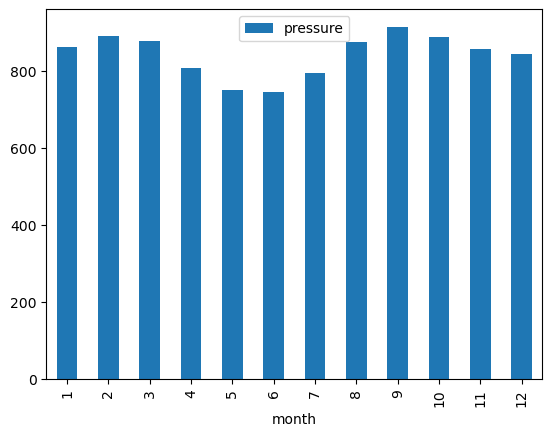

In [39]:
# Plot the average pressure by month
press_avg.plot.bar()

In [40]:
press_avg.reset_index(inplace=True)

In [41]:
highest = press_avg['month'].loc[press_avg['pressure']==max(press_avg['pressure'])]
lowest = press_avg['month'].loc[press_avg['pressure']==min(press_avg['pressure'])]
print(f'The highest pressure is on the {int(highest)}th month & the lowest pressure is on the {int(lowest)}th month! ')

The highest pressure is on the 9th month & the lowest pressure is on the 6th month! 


<AxesSubplot:xlabel='terrestrial_date'>

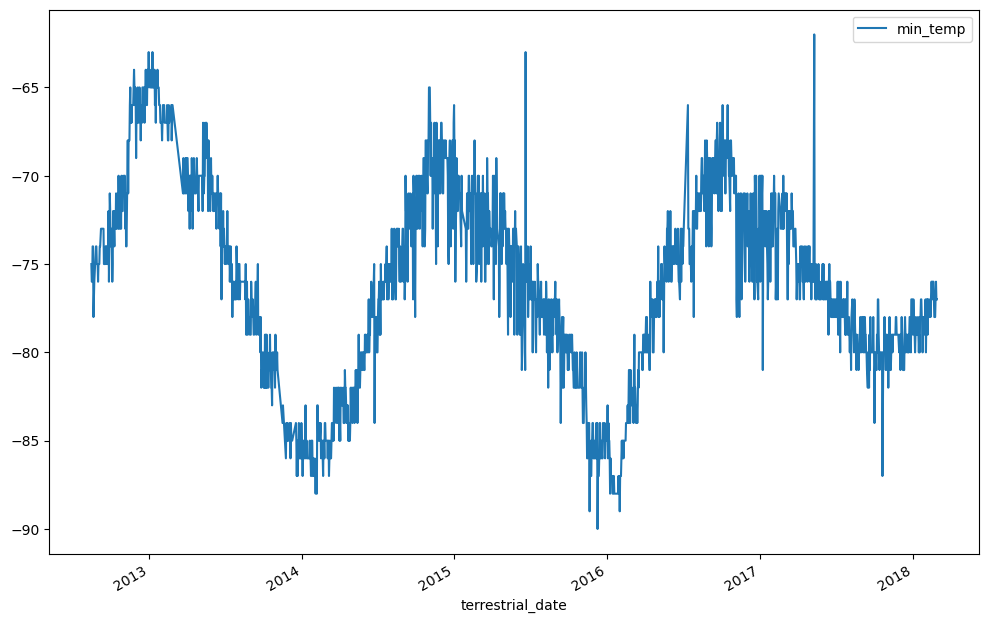

In [42]:
# 5. How many terrestrial (earth) days are there in a Martian year?
table_df.plot('terrestrial_date','min_temp', figsize=(12,8))

In [44]:
# Write the data to a CSV
table_df.to_csv('mars_temp.csv')

In [45]:
browser.quit()